<br><br>
<font size='6'><b>Pre-trained Models
</b></font><br><br>

<br>
<div class=pull-right>
By Prof. Hyunseok OH<br>
https://sddo.gist.ac.kr/<br>
SDDO Lab at GIST
</div>

**Table of Contents**

* [1. Import library](#section1)  
* [2. Data preparation](#section2)  
* [3. Immediate use of pre-trained model](#section3)  
* [4. Fine-tuning procedure](#section4)    
    * [4.1 Feature extraction](#section4.1)  
    * [4.2 Fine-tuning](#section4.2)  

<center><img src="https://github.com/MinseokOff/KSME_advanced/blob/main/Pre_trained/vgg16.png?raw=true" width="700"/></center>

<a name='section1'></a> 
# 1. Import library

In [9]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.applications.vgg16 import decode_predictions

<a name='section2'></a> 
# 2. Load data

In [10]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train[:200].reshape(-1,28,28)
x_train = np.stack([x_train] * 3, axis=3)
train_X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((32,32))) for im in x_train])
y_train = y_train[:200]
train_Y = tf.one_hot(y_train, 10, on_value=1.0, off_value=0.0)

x_test = x_test[:50].reshape(-1,28,28)
x_test = np.stack([x_test] * 3, axis=3)
test_X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((32,32))) for im in x_test])
y_test = y_test[:50]
test_Y = tf.one_hot(y_test, 10, on_value=1.0, off_value=0.0)

x_show = x_test[:3]
x_show = np.asarray([img_to_array(array_to_img(im, scale=False).resize((224,224))) for im in x_show]).astype(int)
y_show = tf.one_hot(y_test[:3], 1000, on_value=1.0, off_value=0.0)

<a name='section3'></a> 
# 3. Immediate use of pre-trained model

예측 :  nematode
정답 :  7


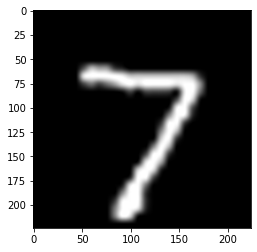

예측 :  nematode
정답 :  2


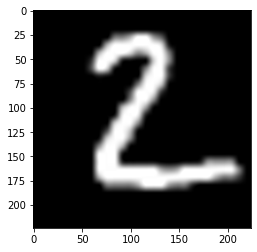

예측 :  nail
정답 :  1


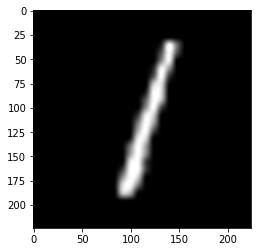

In [11]:
model = VGG16()
pred = decode_predictions(model.predict(x_show), top=1)
for i in range(3):
    print("예측 : ", pred[i][0][1])
    print("정답 : ", np.argmax(y_show[i]))
    plt.imshow(x_show[i])
    plt.show()

* Nematode : 선형동물  
<center><img src="https://github.com/MinseokOff/KSME_advanced/blob/main/Pre_trained/nematode.jpg?raw=true" width="100"/></center>
* Nail : 못  
<center><img src="https://github.com/MinseokOff/KSME_advanced/blob/main/Pre_trained/nail.png?raw=true" width="100"/></center>

<a name='section4'></a> 
# 4. Fine-tuning procedure

<a name='section4.1'></a> 
## 4.1 Feature extraction

(1) 사전 학습된 모델에 새로운 분류기를 추가 및 변경  
(2) 사전 학습된 네트워크를 고정 (Freeze)  
(3) 추가된 새 분류기 학습 

<img src="https://github.com/MinseokOff/KSME_advanced/blob/main/Pre_trained/finetuning.png?raw=true" width="700"/>

Epoch 1/50
7/7 - 4s - loss: 30.7446 - acc: 0.0650 - val_loss: 28.1439 - val_acc: 0.0800 - 4s/epoch - 539ms/step
Epoch 2/50
7/7 - 3s - loss: 29.4302 - acc: 0.0650 - val_loss: 26.8792 - val_acc: 0.0800 - 3s/epoch - 401ms/step
Epoch 3/50
7/7 - 3s - loss: 28.2108 - acc: 0.0650 - val_loss: 25.6510 - val_acc: 0.0800 - 3s/epoch - 397ms/step
Epoch 4/50
7/7 - 3s - loss: 26.9950 - acc: 0.0450 - val_loss: 24.5018 - val_acc: 0.0800 - 3s/epoch - 395ms/step
Epoch 5/50
7/7 - 3s - loss: 25.8758 - acc: 0.0450 - val_loss: 23.4195 - val_acc: 0.0600 - 3s/epoch - 393ms/step
Epoch 6/50
7/7 - 3s - loss: 24.8180 - acc: 0.0400 - val_loss: 22.4281 - val_acc: 0.0600 - 3s/epoch - 391ms/step
Epoch 7/50
7/7 - 3s - loss: 23.8128 - acc: 0.0450 - val_loss: 21.4982 - val_acc: 0.0800 - 3s/epoch - 394ms/step
Epoch 8/50
7/7 - 3s - loss: 22.8543 - acc: 0.0400 - val_loss: 20.6171 - val_acc: 0.0600 - 3s/epoch - 391ms/step
Epoch 9/50
7/7 - 3s - loss: 21.9202 - acc: 0.0400 - val_loss: 19.8143 - val_acc: 0.0600 - 3s/epoch - 392

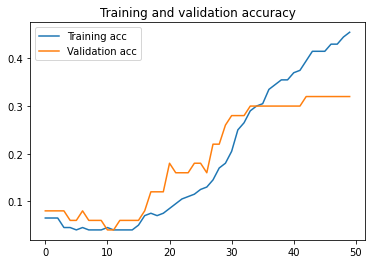

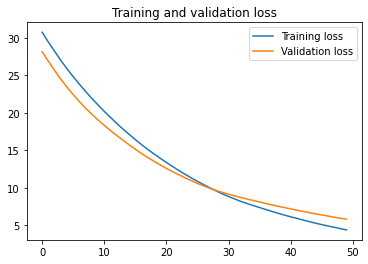

In [12]:
x_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((32,32))) for im in x_train])
x_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((32,32))) for im in x_test])
y_train = tf.one_hot(y_train, 10, on_value=1.0, off_value=0.0)
y_test = tf.one_hot(y_test, 10, on_value=1.0, off_value=0.0)

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(32, 32, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10,activation = 'softmax'))

conv_base.trainable = False

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=2e-5),
              metrics=['acc'])

history = model.fit(
      x_train,
      y_train,
      epochs=50,
      validation_data=(x_test, y_test),
      verbose = 2)

plt.plot(range(len(history.history['acc'])), history.history['acc'], label='Training acc')
plt.plot(range(len(history.history['acc'])), history.history['val_acc'], label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(range(len(history.history['acc'])), history.history['loss'], label='Training loss')
plt.plot(range(len(history.history['acc'])), history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

예측 :  7
정답 :  7


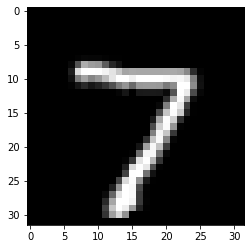

예측 :  3
정답 :  2


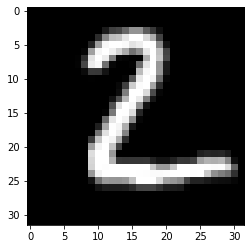

예측 :  1
정답 :  1


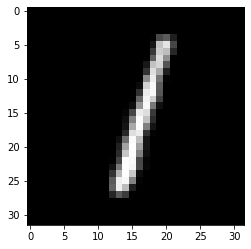

In [13]:
pred = model.predict(x_test[:3])
for i in range(3):
    print("예측 : ", np.argmax(pred[i]))
    print("정답 : ", np.argmax(y_test[i]))
    plt.imshow(x_test[i].astype(int))
    plt.show()

<a name='section4.2'></a> 
## 4.2 Fine-tuning

(4) 사전 학습된 네트워크의 일부 레이어를 고정 해제 (Unfreeze)  
(5) 추가된 분류기와 고정 해제된 일부 레이어를 학습

<center><img src="https://github.com/MinseokOff/KSME_advanced/blob/main/Pre_trained/finetuning.png?raw=true" width="700"/></center>

In [14]:
model.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

Epoch 1/10
7/7 - 12s - loss: 3.4961 - acc: 0.4800 - val_loss: 3.4754 - val_acc: 0.4600 - 12s/epoch - 2s/step
Epoch 2/10
7/7 - 11s - loss: 1.0802 - acc: 0.7700 - val_loss: 2.1089 - val_acc: 0.5400 - 11s/epoch - 2s/step
Epoch 3/10
7/7 - 11s - loss: 0.4703 - acc: 0.8850 - val_loss: 1.8127 - val_acc: 0.6200 - 11s/epoch - 2s/step
Epoch 4/10
7/7 - 11s - loss: 0.1841 - acc: 0.9500 - val_loss: 1.5410 - val_acc: 0.6800 - 11s/epoch - 2s/step
Epoch 5/10
7/7 - 11s - loss: 0.0433 - acc: 0.9950 - val_loss: 1.5427 - val_acc: 0.7400 - 11s/epoch - 2s/step
Epoch 6/10
7/7 - 11s - loss: 0.0214 - acc: 1.0000 - val_loss: 1.5450 - val_acc: 0.7200 - 11s/epoch - 2s/step
Epoch 7/10
7/7 - 11s - loss: 0.0091 - acc: 1.0000 - val_loss: 1.5660 - val_acc: 0.7000 - 11s/epoch - 2s/step
Epoch 8/10
7/7 - 11s - loss: 0.0050 - acc: 1.0000 - val_loss: 1.5974 - val_acc: 0.7000 - 11s/epoch - 2s/step
Epoch 9/10
7/7 - 11s - loss: 0.0034 - acc: 1.0000 - val_loss: 1.6065 - val_acc: 0.7000 - 11s/epoch - 2s/step
Epoch 10/10
7/7 - 1

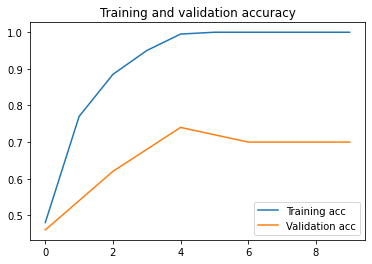

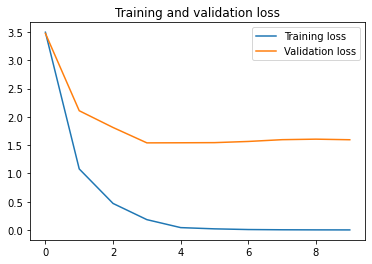

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=2e-5),
              metrics=['acc'])

history = model.fit(
      x_train,
      y_train,
      epochs=10,
      validation_data=(x_test, y_test),
      verbose = 2)

plt.plot(range(len(history.history['acc'])), history.history['acc'], label='Training acc')
plt.plot(range(len(history.history['acc'])), history.history['val_acc'], label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(range(len(history.history['acc'])), history.history['loss'], label='Training loss')
plt.plot(range(len(history.history['acc'])), history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

예측 :  7
정답 :  7


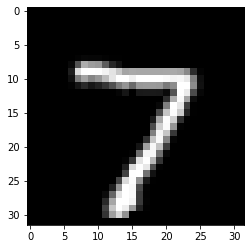

예측 :  2
정답 :  2


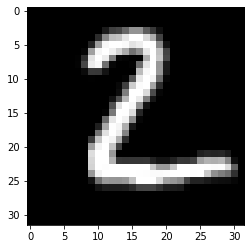

예측 :  1
정답 :  1


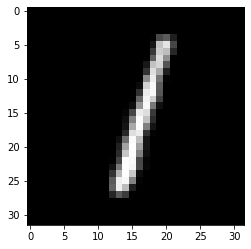

In [16]:
pred = model.predict(x_test[:3])
for i in range(3):
    print("예측 : ", np.argmax(pred[i]))
    print("정답 : ", np.argmax(y_test[i]))
    plt.imshow(x_test[i].astype(int))
    plt.show()